## Learning Objectives

- **Define** what Pandas is and how it relates to data science.
- **Manipulate data** using Pandas `DataFrames` and `Series`.
- **Filter and sort** data using Pandas.
- **Handle** null and missing values.

## Lesson Guide

- [What Is Pandas?](#pandas)
- [Reading Files, Selecting Columns, and Summarizing](#reading-files)
    - [Exercise 1](#exercise-one)
    
    
- [Filtering and Sorting](#filtering-and-sorting)
    - [Exercise 2](#exercise-two)
    
    
- [Renaming, Adding, and Removing Columns](#columns)
- [Handling Missing Values](#missing-values)
    - [Exercise 3](#exercise-three)
    
    
- [Split-Apply-Combine](#split-apply-combine)
    - [Exercise 4](#exercise-four)
    
    
- [Selecting Multiple Columns and Filtering Rows](#multiple-columns)
- [Joining (Merging) DataFrames](#joining-dataframes)
- [OPTIONAL: Other Commonly Used Features](#other-features)
- [OPTIONAL: Other Less Used Features of Pandas](#uncommon-features)
- [Summary](#summary)

<a id="pandas"></a>

## What Is Pandas?

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A **`Series`** is a **sequence** of items, where each item has a unique label (called an `index`).
- A **`DataFrame`** is a **table of data**. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`). Think like a **spreadsheet**
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

_Under the hood, for the savvy reader:_
> Behind the scenes, these datatypes use the NumPy ("Numerical Python") library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:
> - Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
> - Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
> - The total size of an `ndarray` is fixed.

> Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.

## Why is Pandas so popular?

- Contains a large set of commonly used functions.
- It's relatively fast.
- Large open-source community.
- `numpy` is very popular, and since `pandas` is build off of it, it's very easy to use them in tandem.

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax.

For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. In standard Python, this would most likely give a syntax error. (**Challenge:** Using only built-in datatypes, can you define `cars` and `mpg` to make this expression valid?)

## Vectorization

Pandas also highly favors certain patterns of use. For example, looping through a `DataFrame` row by row is highly discouraged. Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

In [1]:
x = range(10)

# Odlen way: Not vectorized!
x_old = [2*i + 1 for i in x]
print(x_old)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


In [2]:
# Vectorized!
import numpy as np
x_vec = np.array(x)

In [3]:
x_vec

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
x_vec = 2*x_vec + 1
print(x_vec)

[ 1  3  5  7  9 11 13 15 17 19]


Do not be discouraged if Pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

## Class Methods and Attributes

Pandas `DataFrame`s are Pandas class objects and therefore come with attributes and methods. To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

```python
- users.index       # accesses the `index` attribute -- note there are no parentheses. attributes are not callable
- users.head()      # calls the `head` method (since there are open/closed parentheses)
- users.head(10)    # calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:
- users.head(n=10)  # calls the `head` method, setting the named parameter `n` to have a value of `10`.
```

We know that the `head` method accepts one parameter with an optional name of `n` because it is in the documentation for that method. Let's see how to view the documentation next.

## Viewing Documentation

There are a few ways to find more information about a method.

**Method 1:** In Jupyter, you can quickly view documentation for a method by following the method name by a `?`, as follows:

```python
users.head?
```

```
Signature: users.head(n=5)
Docstring: Returns first n rows
```

Notice that we would normally invoke this method by calling `users.head(5)`. One quirk of IPython is that the `?` symbol must be the last character in the cell. Otherwise, it might not work.

> The `?` is a shortcut for the built-in Python function `help`, which returns the method's docstring. For example:
```python
help(users.head)
```

In [5]:
sorted?

In [6]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [7]:
print(sorted(x))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [8]:
# Python 2
# print x

# Python 3
# print(x)

**Method 2:** You can also search online for the phrase "`DataFrame head`", since you are calling the method `head` on the `users` object, which happens to be a `DataFrame`. (`type(users) => pandas.DataFrame`)

You can alternatively search online for `pandas head`, but be careful! `DataFrame` and `Series` both have a `head` method, so make sure you view the documentation for the correct one since they might be called differently. You will know you are looking at the correct documentation page because it will say `DataFrame.head` at the top, instead of `Series.head`.

# Let's Go! Pandas time!
<br>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSpjyhD_Llz7GCKBNEobmTjmhFYq8QClRmK4LzyrgEA8YOHPiWZuA">

In [5]:
# Load Pandas into Python
import numpy as np
import pandas as pd
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# What's this?
%matplotlib inline 

<a id="reading-files"></a>
## Reading Files, Selecting Columns, and Summarizing

In [6]:
users = pd.read_table('./data/user.tbl', sep='|')

C:\Users\606800\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


**Examine the users data.**

In [7]:
users                   # Print the first 30 and last 30 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [7]:
type(users)             # DataFrame

pandas.core.frame.DataFrame

In [8]:
users.head()            # Print the first five rows by default.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [9]:
users.head(20)          # Print the first 20 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [10]:
users.tail()            # Print the last five rows by default. Can enter any number. 

,user_id,age,gender,occupation,zip_code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [16]:
users.loc[:2]

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


In [18]:
users.iloc[:2]

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


In [19]:
users.loc[:2,'gender']

0    M
1    F
2    M
Name: gender, dtype: object

In [20]:
users.loc[:2,['age','gender']]

,age,gender
0,24,M
1,53,F
2,23,M


In [21]:
users.iloc[:3, [1, 3]]

,age,occupation
0,24,technician
1,53,other
2,23,writer


In [24]:
users.iloc[:3, 1:4:2]

,age,occupation
0,24,technician
1,53,other
2,23,writer


In [25]:
 # The row index (aka "the row labels" — in this case integers)
users.index            

RangeIndex(start=0, stop=943, step=1)

In [26]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [29]:
users.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [28]:
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [30]:
# Column names (which is "an index")
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [31]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [32]:
# Number of rows and columns
users.shape

(943, 5)

In [34]:
len(users) #gives the number of rows

943

In [35]:
users["age"]

0      24
1      53
2      23
3      24
4      33
5      42
6      57
7      36
8      29
9      53
10     39
11     28
12     47
13     45
14     49
15     21
16     30
17     35
18     40
19     42
20     26
21     25
22     30
23     21
24     39
25     49
26     40
27     32
28     41
29      7
       ..
913    44
914    50
915    27
916    22
917    40
918    25
919    30
920    20
921    29
922    21
923    29
924    18
925    49
926    23
927    21
928    44
929    28
930    60
931    58
932    28
933    61
934    42
935    24
936    48
937    38
938    26
939    32
940    20
941    48
942    22
Name: age, Length: 943, dtype: int64

In [36]:
users[:2][["age", 'gender']]

,age,gender
0,24,M
1,53,F


In [37]:
users.loc[:1, ['age', 'gender']]

,age,gender
0,24,M
1,53,F


In [38]:
# All values as a NumPy array
users.values

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       ...,
       [941, 20, 'M', 'student', '97229'],
       [942, 48, 'F', 'librarian', '78209'],
       [943, 22, 'M', 'student', '77841']], dtype=object)

In [16]:
# Concise summary (including memory usage) — useful to quickly see if nulls exist
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


** Select or index data.**<br>
Pandas `DataFrame`s have structural similarities with Python-style lists and dictionaries.  
In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

In [39]:
# Select a column — returns a Pandas Series (essentially an ndarray with an index)
users['gender']

0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

In [40]:
# DataFrame columns are Pandas Series.
type(users['gender'])

pandas.core.series.Series

In [41]:
def f(df, x):
    return users[x].head()

In [42]:
f(users, 'gender')

0    M
1    F
2    M
3    M
4    F
Name: gender, dtype: object

In [43]:
# Select one column using the DataFrame attribute.
users.gender

# While a useful shorthand, these attributes only exist
# if the column name has no punctuations or spaces.
# Selecting columns this way is usually considered bad prac.

0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

**Summarize (describe) the data.**<br>
Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding.

In [44]:
# Describe all numeric columns.
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [45]:
# Describe all object columns (can include multiple types).
users.describe(include=['object'])

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [46]:
# Describe all columns, including non-numeric.
users.describe(include='all')

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


In [50]:
users.occupation.value_counts ()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
doctor             7
homemaker          7
Name: occupation, dtype: int64

In [51]:
users.occupation.value_counts ().head(10) #top 10 most frequent occ

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
Name: occupation, dtype: int64

In [52]:
users.occupation.value_counts ().tail(10) #top 10 least frequent occ

technician       27
marketing        26
entertainment    18
healthcare       16
retired          14
salesman         12
lawyer           12
none              9
doctor            7
homemaker         7
Name: occupation, dtype: int64

In [54]:
users.occupation.value_counts (ascending=True).head(10) #top 10 least frequent occ

homemaker         7
doctor            7
none              9
lawyer           12
salesman         12
retired          14
healthcare       16
entertainment    18
marketing        26
technician       27
Name: occupation, dtype: int64

In [55]:
# Describe a single column — recall that "users.gender" refers to a Series.
users.gender.describe()

count     943
unique      2
top         M
freq      670
Name: gender, dtype: object

In [56]:
# Calculate the mean of the ages.
users.age.mean()

34.05196182396607

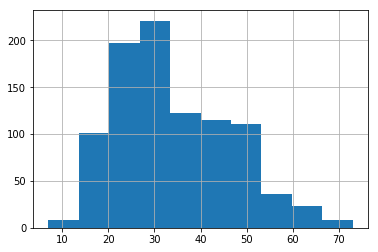

In [57]:
# Draw a histogram of a column (the distribution of ages).
users.age.hist();

**Count the number of occurrences of each value.**

In [58]:
users.gender.value_counts()     # Most useful for categorical variables

M    670
F    273
Name: gender, dtype: int64

In [59]:
users.gender.value_counts(normalize=True)

M    0.710498
F    0.289502
Name: gender, dtype: float64

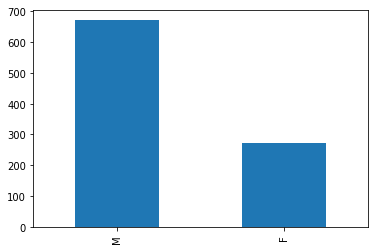

In [60]:
users.gender.value_counts().plot.bar()     # Quick plot by category

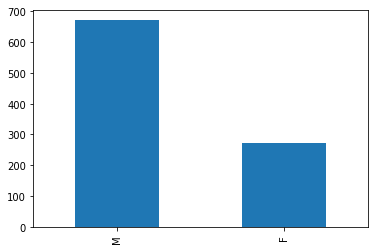

In [61]:
users.gender.value_counts().plot(kind='bar')     # Quick plot by category

In [62]:
# Can also be used with numeric variables
#   Try .sort_index() to sort by indices or .sort_values() to sort by counts.
# users.age.value_counts().sort_values(ascending=False)
users.age.value_counts().sort_index(ascending=False)

73     1
70     3
69     2
68     2
66     1
65     3
64     2
63     3
62     2
61     3
60     9
59     3
58     3
57     9
56     6
55    11
54     4
53    12
52     6
51    20
50    20
49    19
48    20
47    14
46    12
45    15
44    23
43    13
42    21
41    10
      ..
39    22
38    17
37    19
36    21
35    27
34    17
33    26
32    28
31    25
30    39
29    32
28    36
27    35
26    34
25    38
24    33
23    28
22    37
21    27
20    32
19    23
18    18
17    14
16     5
15     6
14     3
13     5
11     1
10     1
7      1
Name: age, Length: 61, dtype: int64

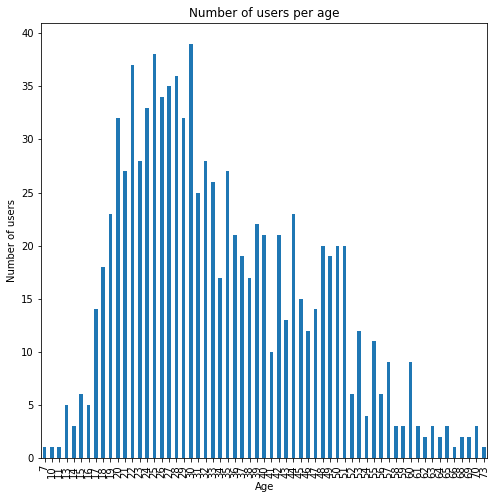

In [63]:
users.age.value_counts().sort_index().plot(kind='bar', figsize=(8, 8));     # Bigger plot by increasing age
plt.xlabel('Age');
plt.ylabel('Number of users');
plt.title('Number of users per age');

<a id="exercise-one"></a>
### Exercise 1

In [3]:
# Read drinks.csv into a DataFrame called "drinks".
import pandas as pd
drinks = pd.read_csv('data/drinks.csv')

In [4]:
# Print the head and the tail.
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [25]:
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [26]:
print(drinks.head())
drinks.tail()

       country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0        AS  
1                           4.9        EU  
2                           0.7        AF  
3                          12.4        EU  
4                           5.9        AF  


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [27]:
# Examine the default index, datatypes, and shape.
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [32]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [31]:
drinks.columns.to_list() #to_list to make index a list and cleaner to view 

['country',
 'beer_servings',
 'spirit_servings',
 'wine_servings',
 'total_litres_of_pure_alcohol',
 'continent']

In [35]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [36]:
drinks.shape #shows rows, columns

(193, 6)

In [37]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [40]:
# Print the beer_servings Series.
drinks['beer_servings'].head()

0      0
1     89
2     25
3    245
4    217
Name: beer_servings, dtype: int64

In [41]:
# Print the beer_servings Series. Same action as above and makes it clearer 
drinks.beer_servings.head()

0      0
1     89
2     25
3    245
4    217
Name: beer_servings, dtype: int64

In [42]:
# Calculate the average beer_servings for the entire data set.
drinks['beer_servings'].mean()

106.16062176165804

In [43]:
drinks.beer_servings.mean() #Same action as above and makes it clearer 

106.16062176165804

In [44]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [45]:
# Count the number of occurrences of each "continent" value and see if it looks correct.
drinks['continent'].value_counts(dropna=False)

AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: continent, dtype: int64

In [51]:
drinks.beer_servings.sort_values(ascending=False).head()

117    376
45     361
62     347
65     346
135    343
Name: beer_servings, dtype: int64

In [52]:
drinks.iloc[100]

country                         Madagascar
beer_servings                           26
spirit_servings                         15
wine_servings                            4
total_litres_of_pure_alcohol           0.8
continent                               AF
Name: 100, dtype: object

<a id="filtering-and-sorting"></a>
### Filtering and Sorting
- **Objective:** Filter and sort data using Pandas.

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

**Logical filtering: Only show users with age < 20.**

In [64]:
# Create a Series of Booleans…
# In Pandas, this comparison is performed element-wise on each row of data.
young_bool = users.age < 20
young_bool.head()

0    False
1    False
2    False
3    False
4    False
Name: age, dtype: bool

In [65]:
# …and use that Series to filter rows.
# In Pandas, indexing a DataFrame by a Series of Booleans only selects rows that are True in the Boolean.
users[young_bool].head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402


In [66]:
users[users.age>30].head()

,user_id,age,gender,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


In [67]:
# Or, combine into a single step.
users[users['age'] < 20].head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402


In [68]:
users[users.age < 20]["occupation"].value_counts()

student          64
other             4
none              3
writer            2
entertainment     2
artist            1
salesman          1
Name: occupation, dtype: int64

In [69]:
users.loc[users.age <20].head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402


In [70]:
users.loc[(users.age <20) & (users.gender == "F")].head()

,user_id,age,gender,occupation,zip_code
35,36,19,F,student,93117
51,52,18,F,student,55105
205,206,14,F,student,53115
222,223,19,F,student,47906
257,258,19,F,student,77801


In [71]:
users.head ()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [72]:
users.loc[(users.age <20) & (users.gender == "F"), :"occupation"]

,user_id,age,gender,occupation
35,36,19,F,student
51,52,18,F,student
205,206,14,F,student
222,223,19,F,student
257,258,19,F,student
261,262,19,F,student
269,270,18,F,student
280,281,15,F,student
340,341,17,F,student
433,434,16,F,student


In [74]:
users.query("age<20").head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402


In [77]:
users.loc[users.gender == "F"].head()

,user_id,age,gender,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
10,11,39,F,other,30329
11,12,28,F,other,06405
14,15,49,F,educator,97301


In [63]:
# Important: This creates a view of the original DataFrame, not a new DataFrame.
# If you alter this view (e.g., by storing it in a variable and altering that)
# You will alter only the slice of the DataFrame and not the actual DataFrame itself
# Here, notice that Pandas gives you a SettingWithCopyWarning to alert you of this.

# It is best practice to use .loc and .iloc instead of the syntax below

users_under20 = users[users.age < 20]   # To resolve this warning, copy the `DataFrame` using `.copy()`.
users_under20['newcolumn'] = 0

C:\Users\606800\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [64]:
users_under20.head()

,user_id,age,gender,occupation,zip_code,newcolumn
29,30,7,M,student,55436,0
35,36,19,F,student,93117,0
51,52,18,F,student,55105,0
56,57,16,M,none,84010,0
66,67,17,M,student,60402,0


In [65]:
# Select one column from the filtered results.
users[users.age < 20].occupation

29           student
35           student
51           student
56              none
66           student
67           student
100          student
109          student
141            other
178    entertainment
205          student
220          student
222          student
245          student
256          student
257          student
261          student
269          student
280          student
288             none
290          student
302          student
319          student
340          student
346          student
366          student
367          student
374    entertainment
392          student
396          student
           ...      
600           artist
608          student
617          student
618          student
619           writer
620          student
623          student
627             none
630          student
631          student
641          student
645          student
673          student
699          student
709          student
728          student
746          

In [66]:
# value_counts of resulting Series
users[users.age < 20]['occupation'].value_counts()

student          64
other             4
none              3
writer            2
entertainment     2
salesman          1
artist            1
Name: occupation, dtype: int64

In [58]:
# data[something]

**Logical filtering with multiple conditions**

In [59]:
# This does NOT work!!
# users[users.age < 20][users.occupation == 'student']

In [67]:
# Ampersand for `AND` condition. (This is a "bitwise" `AND`.)
# Important: You MUST put parentheses around each expression because `&` has a higher precedence than `<`.
users[(users.age < 20) & (users.gender=='M')].head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146


In [78]:
under_20 = users.age < 20
is_male = users.gender == 'M'
users[under_20 & is_male].head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146


In [79]:
under_20 = users.age < 20
is_male = users.gender == 'M'
users[under_20 | is_male].head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
2,3,23,M,writer,32067
3,4,24,M,technician,43537
5,6,42,M,executive,98101
6,7,57,M,administrator,91344


In [70]:
# Pipe for `OR` condition. (This is a "bitwise" `OR`.)
# Important: You MUST put parentheses around each expression because `|` has a higher precedence than `<`.
users[(users.age < 20) | (users.age > 60)].tail()

,user_id,age,gender,occupation,zip_code
879,880,13,M,student,83702
886,887,14,F,student,27249
903,904,17,F,student,61073
924,925,18,F,salesman,49036
933,934,61,M,engineer,22902


In [71]:
# Preferred alternative to multiple `OR` conditions
users[users.occupation.isin(['doctor', 'lawyer'])]

,user_id,age,gender,occupation,zip_code
9,10,53,M,lawyer,90703
124,125,30,M,lawyer,22202
125,126,28,F,lawyer,20015
137,138,46,M,doctor,53211
160,161,50,M,lawyer,55104
204,205,47,M,lawyer,06371
250,251,28,M,doctor,85032
298,299,29,M,doctor,63108
338,339,35,M,lawyer,37901
364,365,29,M,lawyer,20009


In [80]:
users[~users['age'].between(10, 70)]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
480,481,73,M,retired,37771


In [81]:
users[users['age'].between(10, 70)]

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [84]:
users[users.age.between(10, 70)]

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [89]:
users.age.isin 

<bound method Series.isin of 0      24
1      53
2      23
3      24
4      33
5      42
6      57
7      36
8      29
9      53
10     39
11     28
12     47
13     45
14     49
15     21
16     30
17     35
18     40
19     42
20     26
21     25
22     30
23     21
24     39
25     49
26     40
27     32
28     41
29      7
       ..
913    44
914    50
915    27
916    22
917    40
918    25
919    30
920    20
921    29
922    21
923    29
924    18
925    49
926    23
927    21
928    44
929    28
930    60
931    58
932    28
933    61
934    42
935    24
936    48
937    38
938    26
939    32
940    20
941    48
942    22
Name: age, Length: 943, dtype: int64>

**Sorting**

In [8]:
# Sort a Series.
users.age.sort_values().head()

29      7
470    10
288    11
879    13
608    13
Name: age, dtype: int64

In [9]:
users.reset_index?

In [10]:
# Sort a DataFrame by a single column.
users.sort_values('age').head(3)

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
470,471,10,M,student,77459
288,289,11,M,none,94619


In [11]:
# Sort a DataFrame by a single column.
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [67]:
# Use descending order instead.
users.sort_values('age', ascending=False).head(10)

,user_id,age,gender,occupation,zip_code
480,481,73,M,retired,37771
802,803,70,M,administrator,78212
766,767,70,M,engineer,00000
859,860,70,F,retired,48322
584,585,69,M,librarian,98501
558,559,69,M,executive,10022
348,349,68,M,retired,61455
572,573,68,M,retired,48911
210,211,66,M,salesman,32605
650,651,65,M,retired,02903


In [68]:
# Sort by multiple columns.
users.sort_values(['occupation', 'age'], ascending=[True, False])

,user_id,age,gender,occupation,zip_code
802,803,70,M,administrator,78212
265,266,62,F,administrator,78756
130,131,59,F,administrator,15237
818,819,59,M,administrator,40205
6,7,57,M,administrator,91344
561,562,54,F,administrator,20879
671,672,54,F,administrator,90095
538,539,53,F,administrator,80303
224,225,51,F,administrator,58202
327,328,51,M,administrator,06779


<a id="exercise-two"></a>
### Exercise 2
Use the `drinks.csv` or `drinks` `DataFrame` from earlier to complete the following.

In [12]:
import pandas as pd
drinks = pd.read_csv('data/drinks.csv')

In [13]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [14]:
x = np.array([4, 6, 2, 0, 1])

In [15]:
x[[3, 4, 1, 1, 4]]

array([0, 1, 6, 6, 1])

In [16]:
x[[True, False, True, False, True]]

array([4, 2, 1])

In [17]:
eu_only = drinks.continent == 'EU'
wine_more_than_300 = drinks.wine_servings > 300

In [18]:
eu_only.head()

0    False
1     True
2    False
3     True
4    False
Name: continent, dtype: bool

In [19]:
len(eu_only) == len(drinks)

True

In [20]:
eu_only.sum()

45

In [21]:
drinks.columns[1]

'beer_servings'

In [22]:
# Filter DataFrame to only include European countries.
drinks[drinks['continent'] == 'EU']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [23]:
# Filter DataFrame to only include European countries with wine_servings > 300.
drinks[(drinks['continent'] == 'EU') & (drinks['wine_servings'] > 300)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [24]:
is_eu = drinks['continent'] == 'EU'
wine_gt_300 = drinks['wine_servings'] > 300
drinks[is_eu & wine_gt_300]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [27]:
eu = drinks[drinks['continent'] == 'EU']
eu[eu['wine_servings'] > 300]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [28]:
# Calculate the average beer_servings for all of Europe.
eu['beer_servings'].mean()
# eu.beer_servings.mean()

193.77777777777777

In [29]:
# Determine which 10 countries have the highest total_litres_of_pure_alcohol.
drinks.sort_values('total_litres_of_pure_alcohol', ascending=False).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,NaN
45,Czech Republic,361,170,134,11.8,EU
61,France,127,151,370,11.8,EU
141,Russian Federation,247,326,73,11.5,AS
81,Ireland,313,118,165,11.4,EU
155,Slovakia,196,293,116,11.4,EU
99,Luxembourg,236,133,271,11.4,EU


<a id="columns"></a>
### Renaming, Adding, and Removing Columns

- **Objective:** Manipulate `DataFrame` columns.

beer_servings                   1.000000
spirit_servings                 0.458819
wine_servings                   0.527172
total_litres_of_pure_alcohol    0.835839
Name: beer_servings, dtype: float64


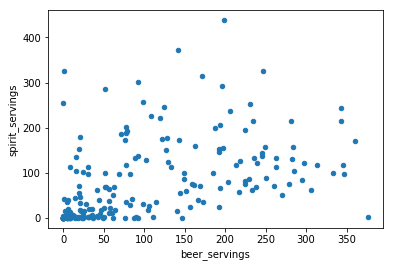

In [30]:
# Are beer servings and spirit servings correlated?
drinks.plot(kind='scatter', x='beer_servings', y='spirit_servings')

print((drinks.corr()['beer_servings']))  # Correlation coefficients

beer_servings                   1.000000
spirit_servings                 0.458819
wine_servings                   0.527172
total_litres_of_pure_alcohol    0.835839
Name: beer_servings, dtype: float64


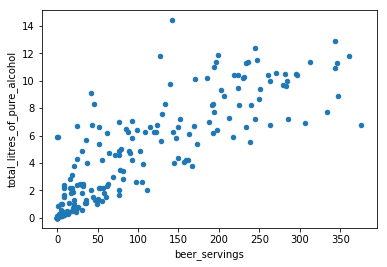

In [31]:
# Are beer servings and spirit servings correlated?
drinks.plot(kind='scatter', x='beer_servings', y='total_litres_of_pure_alcohol')

print((drinks.corr()['beer_servings']))  # Correlation coefficients

In [32]:
drinks.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [33]:
# Rename one or more columns in a single output using value mapping.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'})

,country,beer,spirit_servings,wine,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [34]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [35]:
# Rename one or more columns in the original DataFrame.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'}, inplace=True)

In [36]:
drinks.head()

,country,beer,spirit_servings,wine,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [37]:
# Replace all column names using a list of matching length.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent'] 

# Replace during file reading (disables the header from the file).
drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols)

In [38]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [39]:
# Replace after file has already been read into Python.
drinks.columns = drink_cols

**Easy Column Operations**<br>
Rather than having to reference indexes and create for loops to do column-wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each row together.

In [40]:
# Add a new column as a function of existing columns.
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
drinks['mL'] = drinks.liters * 1000

drinks.head()

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


**Removing Columns**

In [41]:
# axis=0 for rows, 1 for columns
drinks.drop('mL', axis=1).head()

,country,beer,spirit,wine,liters,continent,servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [43]:
# Drop multiple columns.
drinks.drop(['mL', 'servings'], axis=1) # axis 1 is columns (index), axis 0 is rows

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [45]:
drinks.shape #(rows, columns)

(193, 8)

In [46]:
# Drop on the original DataFrame rather than returning a new one.
drinks.drop(['mL', 'servings'], axis=1, inplace=True)

In [47]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [48]:
users.gender.value_counts()

M    670
F    273
Name: gender, dtype: int64

In [50]:
drinks.beer.value_counts()

0      15
5       5
6       4
31      4
25      4
9       4
21      4
1       4
77      3
8       3
52      3
36      3
82      2
149     2
42      2
51      2
343     2
32      2
56      2
193     2
194     2
62      2
245     2
15      2
224     2
19      2
263     2
93      2
76      2
16      2
       ..
89      1
163     1
249     1
347     1
92      1
98      1
99      1
102     1
361     1
106     1
109     1
111     1
115     1
376     1
122     1
124     1
127     1
128     1
130     1
133     1
140     1
142     1
143     1
144     1
147     1
152     1
157     1
159     1
162     1
346     1
Name: beer, Length: 130, dtype: int64

In [51]:
drinks.country.value_counts()

Lesotho                     1
Burundi                     1
Switzerland                 1
Hungary                     1
Armenia                     1
Fiji                        1
Norway                      1
Indonesia                   1
New Zealand                 1
Rwanda                      1
Montenegro                  1
Tonga                       1
Canada                      1
Cook Islands                1
Grenada                     1
Suriname                    1
Honduras                    1
Belgium                     1
Laos                        1
Belize                      1
Liberia                     1
Mozambique                  1
Timor-Leste                 1
Central African Republic    1
Qatar                       1
India                       1
Monaco                      1
Kazakhstan                  1
El Salvador                 1
Italy                       1
                           ..
South Korea                 1
Guinea                      1
Iran      

In [52]:
users.gender[:5] #skips the first 5 

0    M
1    F
2    M
3    M
4    F
Name: gender, dtype: object

In [92]:
# data_raw = pd.read_csv('asfdsaf.csv')
# data_clean = data_raw.drop('dsafsadf', axis=1)

<a id="missing-values"></a>
### Handling Missing Values

- **Objective:** Know how to handle null and missing values.

Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

> In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

> - **For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

In [53]:
np.NaN

nan

In [54]:
np.nan

nan

In [55]:
3 + np.nan

nan

In [56]:
np.nan * np.inf

nan

In [57]:
np.mean([3, 4, 1, 3, np.nan])

nan

In [58]:
pd.Series([3, 4, 1, 4, 2, np.nan]).mean()

2.8

In [59]:
bool(np.nan)

True

In [60]:
bool(None)

False

In [61]:
# Missing values are usually excluded in calculations by default.
drinks.continent.value_counts()              # Excludes missing values in the calculation

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [62]:
# Includes missing values
drinks.continent.value_counts(dropna=False)

AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: continent, dtype: int64

In [63]:
# Find missing values in a Series.
# True if missing, False if not missing
drinks.continent.isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: continent, dtype: bool

In [64]:
# Count the missing values — sum() works because True is 1 and False is 0. About 12% of the values in this column "continent" is missing 
drinks.continent.isnull().mean()

0.11917098445595854

In [65]:
# True if not missing, False if missing
drinks.continent.notnull()

0       True
1       True
2       True
3       True
4       True
5      False
6       True
7       True
8       True
9       True
10      True
11     False
12      True
13      True
14     False
15      True
16      True
17     False
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
163     True
164     True
165     True
166     True
167     True
168     True
169     True
170     True
171     True
172     True
173     True
174    False
175     True
176     True
177     True
178     True
179     True
180     True
181     True
182     True
183     True
184    False
185     True
186     True
187     True
188     True
189     True
190     True
191     True
192     True
Name: continent, Length: 193, dtype: bool

In [66]:
# True if not missing, False if missing
drinks.continent.notnull().mean()

0.8808290155440415

In [67]:
# Only show rows where continent is not missing.
drinks[drinks.continent.isnull()]

,country,beer,spirit,wine,liters,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


**Understanding Pandas Axis**

In [68]:
# Sums "down" the 0 axis (rows) — so, we get the sums of each column
drinks.sum(axis=0)

country    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                   20489
spirit                                                 15632
wine                                                    9544
liters                                                 910.4
dtype: object

In [69]:
# axis=0 is the default.
drinks.sum()

country    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                   20489
spirit                                                 15632
wine                                                    9544
liters                                                 910.4
dtype: object

In [71]:
# Sums "across" the 1 axis (columns) — so, we get the sums of numeric values in the row (beer+spirit+wine+liters+…)
drinks.sum(axis=1)

0        0.0
1      279.9
2       39.7
3      707.4
4      324.9
5      279.9
6      447.3
7      214.8
8      555.4
9      554.7
10      73.3
11     355.3
12     114.0
13       0.0
14     358.3
15     571.4
16     601.5
17     391.8
18      52.1
19      23.4
20     219.8
21     261.6
22     248.4
23     413.2
24      34.6
25     587.3
26      43.3
27      94.3
28      49.0
29     220.0
       ...  
163    318.6
164     98.7
165    405.2
166    575.2
167     57.0
168     17.3
169    364.4
170    222.9
171      6.1
172     58.3
173     63.1
174    366.4
175     75.3
176     81.4
177    124.2
178     57.0
179     62.3
180    496.9
181    158.8
182    550.4
183     48.7
184    499.7
185    376.6
186    136.4
187     50.9
188    443.7
189    116.0
190      6.1
191     57.5
192     90.7
Length: 193, dtype: float64

In [72]:
drinks.sum(axis=1).sort_values()

0        0.0
128      0.0
111      0.0
46       0.0
107      0.0
147      0.0
106      0.0
158      0.0
13       0.0
103      0.0
97       0.0
90       0.0
79       0.0
149      5.1
38       5.1
171      6.1
123      6.1
190      6.1
78       6.1
116      6.1
104      7.6
70      11.2
119     11.2
53      11.2
63      11.4
80      12.2
168     17.3
102     17.3
150     17.3
34      17.4
       ...  
62     512.9
120    538.4
182    550.4
151    550.6
9      554.7
8      555.4
160    563.0
144    567.1
93     569.5
15     571.4
166    575.2
42     581.2
25     587.3
48     593.4
140    596.4
16     601.5
81     607.4
156    607.6
136    611.0
155    616.4
135    624.9
75     645.3
65     649.3
99     651.4
98     655.9
141    657.5
61     659.8
45     676.8
68     676.9
3      707.4
Length: 193, dtype: float64

In [70]:
drinks.mean() #skips country bc its a string 

beer      106.160622
spirit     80.994819
wine       49.450777
liters      4.717098
dtype: float64

In [73]:
drinks.set_index("country").sum(axis=1).sort_values()

country
Afghanistan             0.0
Pakistan                0.0
Monaco                  0.0
North Korea             0.0
Mauritania              0.0
San Marino              0.0
Marshall Islands        0.0
Somalia                 0.0
Bangladesh              0.0
Maldives                0.0
Libya                   0.0
Kuwait                  0.0
Iran                    0.0
Saudi Arabia            5.1
Comoros                 5.1
Timor-Leste             6.1
Niger                   6.1
Yemen                   6.1
Indonesia               6.1
Myanmar                 6.1
Mali                    7.6
Guinea                 11.2
Nepal                  11.2
Egypt                  11.2
Gambia                 11.4
Iraq                   12.2
Tajikistan             17.3
Malaysia               17.3
Senegal                17.3
Chad                   17.4
                      ...  
Gabon                 512.9
Netherlands           538.4
United Kingdom        550.4
Serbia                550.6
Austria     

In [74]:
drinks.head()#orginal data frame doesnt change 

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


**Find missing values in a `DataFrame`.**

In [75]:
# DataFrame of Booleans
drinks.isnull()

,country,beer,spirit,wine,liters,continent
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,True
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [76]:
drinks.set_index("country")

,beer,spirit,wine,liters,continent
country,,,,,
Afghanistan,0,0,0,0.0,AS
Albania,89,132,54,4.9,EU
Algeria,25,0,14,0.7,AF
Andorra,245,138,312,12.4,EU
Angola,217,57,45,5.9,AF
Antigua & Barbuda,102,128,45,4.9,NaN
Argentina,193,25,221,8.3,SA
Armenia,21,179,11,3.8,EU
Australia,261,72,212,10.4,OC


In [77]:
# Count the missing values in each column — remember by default, axis=0.
drinks.isnull().mean()

country      0.000000
beer         0.000000
spirit       0.000000
wine         0.000000
liters       0.000000
continent    0.119171
dtype: float64

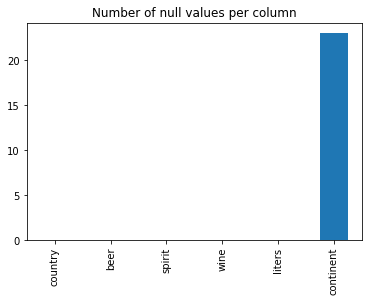

In [78]:
drinks.isnull().sum().plot(kind='bar');         # visually
plt.title('Number of null values per column');

**Dropping Missing Values**

In [79]:
# Drop a row if ANY values are missing from any column — can be dangerous!
print(drinks.shape)
print(drinks.dropna().shape)

(193, 6)
(170, 6)


In [81]:
drinks #orginal stays the same, how do you pull the new info

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [82]:
# Drop a row only if ALL values are missing.
print(drinks.shape)
print(drinks.dropna(how='all').shape)

(193, 6)
(193, 6)


**Filling Missing Values**<br>
You may have noticed that the continent North America (NA) does not appear in the `continent` column. Pandas read in the original data and saw "NA", thought it was a missing value, and converted it to a `NaN`, missing value.

In [83]:
# Fill in missing values with "NA" — this is dangerous to do without manually verifying them!
print(drinks.continent.value_counts())
print('')
print(drinks.continent.fillna(value='NA').value_counts())

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64


In [84]:
# Modifies "drinks" in-place
drinks.continent.fillna(value='NA', inplace=True)

In [85]:
# Turn off the missing value filter — this is a better approach!
drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols, na_filter=False)
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

<a id="exercise-three"></a>
### Exercise 3

In [118]:
# Read ufo.csv into a DataFrame called "ufo".
ufo_data = 'data/ufo.csv'
ufo = pd.read_csv(ufo_data)

In [119]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [120]:
# Check the shape of the DataFrame.
ufo.shape

(80543, 5)

In [121]:
# What are the three most common colors reported?
ufo['Colors Reported'].value_counts().head(3)

ORANGE    5216
RED       4809
GREEN     1897
Name: Colors Reported, dtype: int64

In [122]:
# Rename any columns with spaces so that they don't contain spaces.
ufo.columns = ['city', 'colors', 'shape', 'state', 'time']

In [123]:
# ufo.rename(columns={
#     'Colors Reported':'colors',
#     'Shape Reported':'shape'
# }, inplace=True)

In [124]:
# ufo.columns = ufo.columns.str.replace(' ', '_').str.lower()

In [125]:
ufo.columns

Index(['city', 'colors', 'shape', 'state', 'time'], dtype='object')

In [126]:
# For reports in VA, what's the most common city?
ufo[ufo['state'] == 'VA']['city'].value_counts().head()

Virginia Beach    110
Richmond           92
Alexandria         48
Roanoke            35
Chesapeake         33
Name: city, dtype: int64

In [127]:
# Print a DataFrame containing only reports from Arlington, VA.
ufo[  (ufo['state'] == 'NJ')   &   (ufo['city'] == 'Towaco')  ]

,city,colors,shape,state,time
1585,Towaco,NaN,CIRCLE,NJ,5/20/1968 19:00
45630,Towaco,NaN,TRIANGLE,NJ,8/13/2008 1:00
71134,Towaco,NaN,OVAL,NJ,7/15/2013 22:00


In [128]:
# Count the number of missing values in each column.
ufo.isnull().mean()

city      0.000584
colors    0.788510
shape     0.104317
state     0.000000
time      0.000000
dtype: float64

In [129]:
ufo.shape

(80543, 5)

In [130]:
# How many rows remain if you drop all rows with any missing values?
ufo.dropna(thresh=4).shape

(73621, 5)

<a id="split-apply-combine"></a>
### Split-Apply-Combine

Split-apply-combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the `mean()` function to find the average beer consumption.
- **Combine:** We now combine the continent names with the `mean()`s to produce a summary of our findings.

In [86]:
# For each continent, calculate the mean beer servings.
drinks.groupby('continent').beer.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer, dtype: float64

In [87]:
# For each continent, calculate the mean of all numeric columns.
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [88]:
drinks.groupby('continent').sum()

,beer,spirit,wine,liters
continent,,,,
AF,3258,866,862,159.4
AS,1630,2677,399,95.5
EU,8720,5965,6400,387.8
NA,3345,3812,564,137.9
OC,1435,935,570,54.1
SA,2101,1377,749,75.7


In [89]:
# For each continent, describe beer servings. Specifing beer as column to analzye 
drinks.groupby('continent').beer.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
AS,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
EU,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
NA,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
OC,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
SA,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [90]:
# Similar, but outputs a DataFrame and can be customized — "agg" allows you to aggregate results of Series functions
# drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max', 'median']), custom set of parameters 
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max']).sort_values('mean')

,count,mean,min,max
continent,,,,
AS,44,37.045455,0,247
AF,53,61.471698,0,376
OC,16,89.687500,0,306
NA,23,145.434783,1,285
SA,12,175.083333,93,333
EU,45,193.777778,0,361


In [135]:
def mean_trim(x):
    return np.mean(x[x != 0])

def count_nonzero(x):
    return len(x[x != 0])

In [136]:
drinks.groupby('continent')['beer'].agg(['count', 'mean', count_nonzero, mean_trim])

,count,mean,count_nonzero,mean_trim
continent,,,,
AF,53,61.471698,50,65.160000
AS,44,37.045455,36,45.277778
EU,45,193.777778,43,202.790698
NA,23,145.434783,23,145.434783
OC,16,89.687500,14,102.500000
SA,12,175.083333,12,175.083333


In [91]:
# For each continent, describe all numeric columns.
drinks_grp = drinks.groupby('continent').describe()
drinks.groupby('continent').describe()

beer                                                             \
          count        mean        std   min     25%    50%     75%    max   
continent                                                                    
AF         53.0   61.471698  80.557816   0.0   15.00   32.0   76.00  376.0   
AS         44.0   37.045455  49.469725   0.0    4.25   17.5   60.50  247.0   
EU         45.0  193.777778  99.631569   0.0  127.00  219.0  270.00  361.0   
NA         23.0  145.434783  79.621163   1.0   80.00  143.0  198.00  285.0   
OC         16.0   89.687500  96.641412   0.0   21.00   52.5  125.75  306.0   
SA         12.0  175.083333  65.242845  93.0  129.50  162.5  198.00  333.0   

          spirit              ...    wine        liters                      \
           count        mean  ...     75%    max  count      mean       std   
continent                     ...                                             
AF          53.0   16.339623  ...   13.00  233.0   53.0  3.007547  2.647557   
AS          44.0   60.840909  ...    8.00  123.0   44.0  2.170455  2.770239   
EU          45.0  132.555556  ...  195.00  370.0   45.0  8.617778  3.358455   
NA          23.0  165.739130  ...   34.00  100.0   23.0  5.995652  2.409353   
OC          16.0   58.437500  ...   23.25  212.0   16.0  3.381250  3.345688   
SA          12.0  114.750000  ...   98.50  221.0   12.0  6.308333  1.531166   

                                           
           min   25%    50%     75%   max  
continent                                  
AF         0.0  0.70   2.30   4.700   9.1  
AS         0.0  0.10   1.20   2.425  11.5  
EU         0.0  6.60  10.00  10.900  14.4  
NA         2.2  4.30   6.30   7.000  11.9  
OC         0.0  1.00   1.75   6.150  10.4  
SA         3.8  5.25   6.85   7.375   8.3  

[6 rows x 32 columns]

In [93]:
drinks_grp['liters']['mean']['NA']

5.995652173913044

In [94]:
# For each continent, count the number of rows.
print(drinks.groupby('continent').continent.count())
print('')
print(drinks.continent.value_counts())   # should be the same

continent
AF    53
AS    44
EU    45
NA    23
OC    16
SA    12
Name: continent, dtype: int64

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64


<a id="exercise-four"></a>
### Exercise 4

Use the "users" `DataFrame` or "users" file in the Data folder to complete the following.

In [141]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [142]:
# For each occupation in "users", count the number of occurrences.
users['occupation'].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
doctor             7
homemaker          7
Name: occupation, dtype: int64

In [144]:
users.groupby('occupation')['occupation'].count()

occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
Name: occupation, dtype: int64

In [145]:
# For each occupation, calculate the mean age.
users.groupby("occupation")["age"].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [147]:
users.loc[users['occupation'] == 'librarian', :].head()

,user_id,age,gender,occupation,zip_code
18,19,40,M,librarian,02138
26,27,40,F,librarian,30030
42,43,29,F,librarian,20854
55,56,25,M,librarian,46260
87,88,49,F,librarian,11701


In [148]:
# For each occupation, calculate the minimum and maximum ages.
users.groupby('occupation')['age'].agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [149]:
# For each combination of occupation and gender, calculate the mean age.
users.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

----

<a id="multiple-columns"></a>
### Selecting Multiple Columns and Filtering Rows

In [150]:
ufo.rename(columns={
    'city': 'City',
    'state': 'State'
}, inplace=True)

In [179]:
# Select multiple columns — yet another overload of the DataFrame indexing operator!
my_cols = ['City', 'State']     # Create a list of column names...
ufo[my_cols].head()                    # ...and use that list to select columns.

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [180]:
# Or, combine into a single step (this is a Python list inside of the Python index operator!).
ufo[   ['City', 'State']   ].head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


**Use `loc` to select columns by name.**

In [182]:
# "loc" locates the values from the first parameter (colon means "all rows"), and the column "City".
ufo.loc[:, 'City'].head() 

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

In [183]:
# Select two columns.
ufo.loc[:, ['City', 'State']].head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [184]:
# Select a range of columns — unlike Python ranges, Pandas index ranges INCLUDE the final column in the range.
ufo.loc[:, 'City':'State'].head()

,City,colors,shape,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


In [185]:
# "loc" can also filter rows by "name" (the index).
# Row 0, all columns
ufo.loc[0, :]

City              Ithaca
colors               NaN
shape           TRIANGLE
State                 NY
time      6/1/1930 22:00
Name: 0, dtype: object

In [186]:
# Rows 0/1/2, all columns
ufo.loc[0:2, :]

,City,colors,shape,State,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [187]:
# Rows 0/1/2, range of columns
ufo.loc[0:2, 'City':'State'] 

,City,colors,shape,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [188]:
ufo.loc[ufo['City'] == 'Towaco', 'City':'State']

,City,colors,shape,State
1585,Towaco,NaN,CIRCLE,NJ
45630,Towaco,NaN,TRIANGLE,NJ
71134,Towaco,NaN,OVAL,NJ


In [ ]:
# ufo[ufo['City'] == 'Towaco']['City']

In [151]:
# Use "iloc" to filter rows and select columns by integer position.
# (Remember that rows/columns use indices, so "iloc" lets you refer to indices via their index rather than value!)
# All rows, columns in position 0 and 3 (City/State)
ufo.iloc[:, [0, 3]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR


In [153]:
# All rows, columns in position 0/1/2/3
# Note here it is NOT INCLUDING 4 because this is an integer range, not a Pandas index range!
ufo.iloc[:, 0:4].head()

,City,colors,shape,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


In [154]:
# Rows in position 0/1/2, all columns
ufo.iloc[:3, :] 

,City,colors,shape,State,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


<a id="joining-dataframes"></a>
### Joining (Merging) `DataFrames`

In [95]:
import pandas as pd
movie_cols = ['movie_id', 'title']
movies_filename = 'data/movies.tbl'

movies = pd.read_csv(movies_filename, sep='|', header=None, names=movie_cols, usecols=[0, 1], encoding='latin1')
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [96]:
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_filename = 'data/movie_ratings.tsv'

ratings = pd.read_csv(ratings_filename, sep='\t', header=None, names=rating_cols)
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [97]:
# Merge "movies" and "ratings" (inner join on "movie_id").
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [98]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

(1682, 2)
(100000, 4)
(100000, 5)


In [100]:
movie_ratings.title

0                                 Toy Story (1995)
1                                 Toy Story (1995)
2                                 Toy Story (1995)
3                                 Toy Story (1995)
4                                 Toy Story (1995)
5                                 Toy Story (1995)
6                                 Toy Story (1995)
7                                 Toy Story (1995)
8                                 Toy Story (1995)
9                                 Toy Story (1995)
10                                Toy Story (1995)
11                                Toy Story (1995)
12                                Toy Story (1995)
13                                Toy Story (1995)
14                                Toy Story (1995)
15                                Toy Story (1995)
16                                Toy Story (1995)
17                                Toy Story (1995)
18                                Toy Story (1995)
19                             

In [105]:
movie_ratings.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [103]:
movie_ratings.title.str.split() #attemp to try and split Toy Story and Year

0                                     [Toy, Story, (1995)]
1                                     [Toy, Story, (1995)]
2                                     [Toy, Story, (1995)]
3                                     [Toy, Story, (1995)]
4                                     [Toy, Story, (1995)]
5                                     [Toy, Story, (1995)]
6                                     [Toy, Story, (1995)]
7                                     [Toy, Story, (1995)]
8                                     [Toy, Story, (1995)]
9                                     [Toy, Story, (1995)]
10                                    [Toy, Story, (1995)]
11                                    [Toy, Story, (1995)]
12                                    [Toy, Story, (1995)]
13                                    [Toy, Story, (1995)]
14                                    [Toy, Story, (1995)]
15                                    [Toy, Story, (1995)]
16                                    [Toy, Story, (1995

<a id="other-features"></a>
### OPTIONAL: Other Commonly Used Features

In [159]:
def quad(x):
    return 4*x

In [160]:
def do_thing(f, x):
    return f(x)

In [162]:
do_thing(quad, 8)

32

In [164]:
do_thing(lambda x: 4*x, 8)

32

In [165]:
def adder(x):
    return lambda y: x + y

In [166]:
add3 = adder(3)

In [168]:
add3(5)

8

In [169]:
adder(3)(5)

8

In [171]:
# Apply an arbitrary function to each value of a Pandas column, storing the result in a new column.
#users['under30'] = users.age.apply(lambda age: age < 30)
users.age.apply(lambda age: age < 30).head()

0     True
1    False
2     True
3     True
4    False
Name: age, dtype: bool

In [173]:
(users['age'] < 30).head()

0     True
1    False
2     True
3     True
4    False
Name: age, dtype: bool

In [174]:
# Apply an arbitrary function to each row of a DataFrame, storing the result in a new column.
#  (Remember that, by default, axis=0. Since we want to go row by row, we set axis=1.)
users['under30male'] = users.apply(lambda row: row.age < 30 and row.gender == 'M', axis=1)

In [175]:
users.head()

,user_id,age,gender,occupation,zip_code,under30male
0,1,24,M,technician,85711,True
1,2,53,F,other,94043,False
2,3,23,M,writer,32067,True
3,4,24,M,technician,43537,True
4,5,33,F,other,15213,False


In [176]:
# Map existing values to a different set of values.
users['is_male'] = users.gender.map({'F':0, 'M':1})

In [177]:
users.head()

,user_id,age,gender,occupation,zip_code,under30male,is_male
0,1,24,M,technician,85711,True,1
1,2,53,F,other,94043,False,0
2,3,23,M,writer,32067,True,1
3,4,24,M,technician,43537,True,1
4,5,33,F,other,15213,False,0


In [ ]:
# Replace all instances of a value in a column (must match entire value).
ufo.State.replace('Fl', 'FL', inplace=True)

In [ ]:
# String methods are accessed via "str".
ufo.State.str.upper()                               # Converts to upper case
# checks for a substring
ufo['Colors Reported'].str.contains('RED', na='False') 

In [178]:
# Convert a string to the datetime format (this is often slow — consider doing it in the "read_csv()" method.)
ufo['time'] = pd.to_datetime(ufo.time)
print(ufo.time.dt.hour.head())          # Datetime format exposes convenient attributes
(ufo.time.max() - ufo.time.min()).days  # Also allows you to do datetime "math"

0    22
1    20
2    14
3    13
4    19
Name: time, dtype: int64


30776

In [179]:
ufo.head()

,City,colors,shape,State,time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [ ]:
# Set and then remove an index.
ufo.set_index('Time', inplace=True)
ufo.reset_index(inplace=True)

In [ ]:
# Change the datatype of a column.
drinks['beer'] = drinks.beer.astype('float')

In [ ]:
# Create dummy variables for "continent" and exclude first dummy column.
continent_dummies = pd.get_dummies(drinks.continent, prefix='cont')#.iloc[:, 1:]

In [ ]:
continent_dummies.head()

In [ ]:
# Concatenate two DataFrames (axis=0 for rows, axis=1 for columns).
drinks = pd.concat([drinks, continent_dummies], axis=1)

<a id="uncommon-features"></a>
### OPTIONAL: Other Less-Used Features of Pandas

In [ ]:
# Detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # Count of duplicates
users[users.duplicated()]   # Only show duplicates
users.drop_duplicates()     # Drop duplicate rows
users.age.duplicated()      # Check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # Specify columns for finding duplicates

In [182]:
# Convert a range of values into descriptive groups.
drinks['beer_level'] = 'low'    # Initially set all values to "low"
drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'     # Change 101-200 to "med"
drinks.loc[drinks.beer.between(201, np.inf), 'beer_level'] = 'high'    # Change 201-400 to "high"

In [185]:
# Display a cross-tabulation of two Series.
pd.crosstab(drinks.continent, drinks.beer_level)

beer_level,low,med,high
continent,,,
AF,45,4,4
AS,40,3,1
EU,9,12,24
NA,8,10,5
OC,11,2,3
SA,1,8,3


In [184]:
# Convert "beer_level" into the "category" datatype.
drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level')   # Sorts by the categorical ordering (low to high)

,country,beer,spirit,wine,liters,continent,beer_level
0,Afghanistan,0,0,0,0.0,AS,low
102,Malaysia,13,4,0,0.3,AS,low
103,Maldives,0,0,0,0.0,AS,low
104,Mali,5,1,1,0.6,AF,low
106,Marshall Islands,0,0,0,0.0,OC,low
107,Mauritania,0,0,0,0.0,AF,low
108,Mauritius,98,31,18,2.6,AF,low
101,Malawi,8,11,1,1.5,AF,low
110,Micronesia,62,50,18,2.3,OC,low
112,Mongolia,77,189,8,4.9,AS,low


In [ ]:
# Limit which rows are read when reading in a file — useful for large files!
pd.read_csv('data/drinks.csv', nrows=10)           # Only read first 10 rows
pd.read_csv('data/drinks.csv', skiprows=[1, 2])    # Skip the first two rows of data

In [189]:
drinks.to_csv("MYCOOLDATA.csv", index=False)

In [190]:
cool_data = pd.read_csv("MYCOOLDATA.csv")

In [191]:
cool_data.head()

,country,beer,spirit,wine,liters,continent,beer_level
0,Afghanistan,0,0,0,0.0,AS,low
1,Albania,89,132,54,4.9,EU,low
2,Algeria,25,0,14,0.7,AF,low
3,Andorra,245,138,312,12.4,EU,high
4,Angola,217,57,45,5.9,AF,high


In [ ]:
# Write a DataFrame out to a .csv
drinks.to_csv('drinks_updated.csv')                 # Index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # Ignore index

In [ ]:
# Create a DataFrame from a dictionary.
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

In [ ]:
# Create a DataFrame from a list of lists.
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])

In [ ]:
# Randomly sample a DataFrame.
import NumPy as np
mask = np.random.rand(len(drinks)) < 0.66   # Create a Series of Booleans
train = drinks[mask]                        # Will contain around 66% of the rows
test = drinks[~mask]                        # Will contain the remaining rows

In [ ]:
# Change the maximum number of rows and columns printed ('None' means unlimited).
pd.set_option('max_rows', None)     # Default is 60 rows
pd.set_option('max_columns', None)  # Default is 20 columns
print(drinks)

In [ ]:
# Reset options to defaults.
pd.reset_option('max_rows')
pd.reset_option('max_columns')

In [ ]:
# Change the options temporarily (settings are restored when you exit the "with" block).
with pd.option_context('max_rows', None, 'max_columns', None):
    print(drinks)

<a id="summary"></a>
### Summary

Believe it or not, we've only barely touched the surface of everything that Pandas offers. Don't worry if you don't remember most of it — for now, just knowing what exists is key. Remember that the more you use Pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating `DataFrames` and `Series`
- Filtering columns and rows
- Handling missing values
- Split-apply-combine (this one takes some practice!)